### Pregunta de Negocio - Analistes de Finances i Risc Crediticio

> En quina **mesura** els clients amb **saldos més baixos** estan en **més risc d'incompliment de crèdit**, i com hem d'ajustar les nostres polítiques de crèdit per mitigar aquest risc?
>

### Carga de datos

In [21]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

In [22]:
df = pd.read_csv("../Data/df.csv")

### Extracto del EDA

<Axes: >

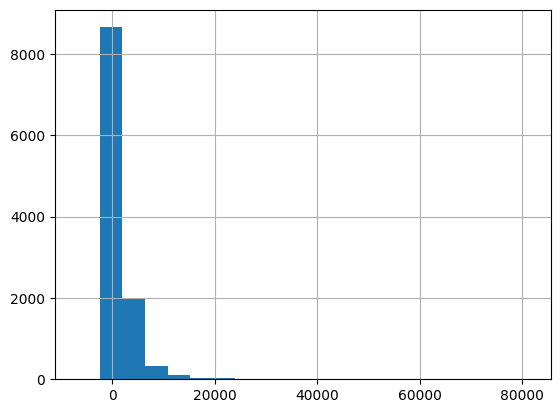

In [23]:
df['balance'].hist(bins=20)

count    11141.000000
mean      1529.583072
std       3227.835848
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1709.000000
max      81204.000000
Name: balance, dtype: float64


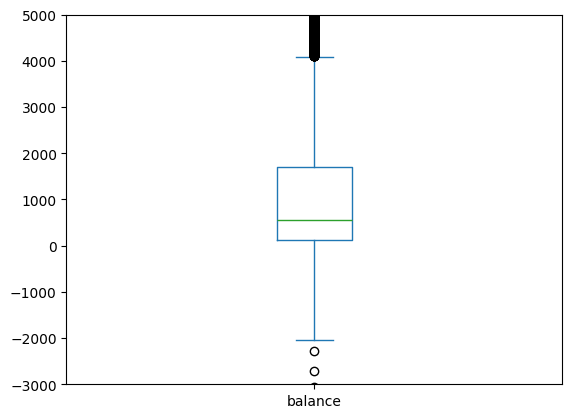

In [24]:
print(df['balance'].describe())
df['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

          count         mean          std     min     25%    50%      75%  \
deposit                                                                     
False    5860.0  1281.471331  2936.286290 -6847.0   64.75  414.0  1324.75   
True     5281.0  1804.897368  3502.996456 -3058.0  210.00  733.0  2160.00   

             max  
deposit           
False    66653.0  
True     81204.0  


<Axes: xlabel='balance', ylabel='Count'>

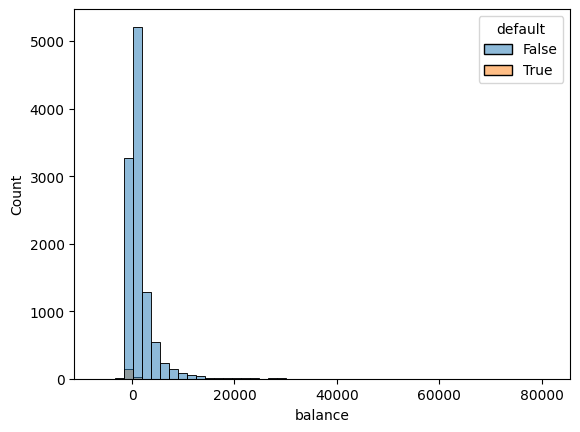

In [25]:
print(df.groupby('deposit')['balance'].describe())
sns.histplot(data=df, x='balance', hue='default', bins=50)

balance_group
0-500        3882
500-1500     2697
1500-5000    2332
Deute        1459
5000+         771
Name: count, dtype: int64


<Axes: xlabel='balance_group'>

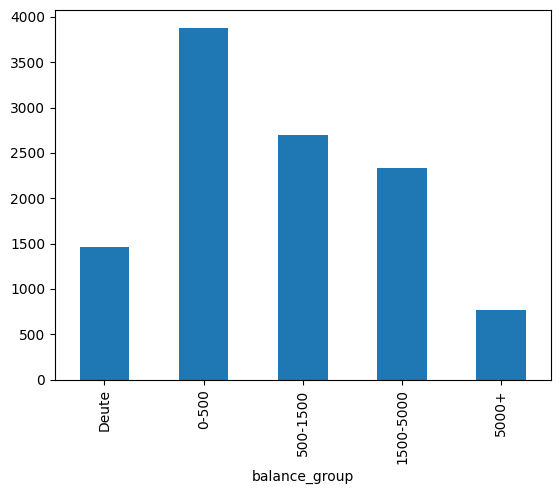

In [26]:
bins=[-7000, 0, 500, 1500, 5000, 82000]
labels=['Deute', '0-500', '500-1500', '1500-5000', '5000+']

df['balance_group'] = pd.cut(df['balance'],bins=bins, labels=labels)
print(df['balance_group'].value_counts())

df['balance_group'].value_counts().reindex(labels).plot.bar()

In [27]:
df.groupby('balance_group')['default'].value_counts()

C:\Users\maria\AppData\Local\Temp\ipykernel_22448\4064366664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('balance_group')['default'].value_counts()


balance_group  default
Deute          False      1356
               True        103
0-500          False      3831
               True         51
500-1500       False      2685
               True         12
1500-5000      False      2331
               True          1
5000+          False       770
               True          1
Name: count, dtype: int64